<a id="title-id"></a>


# Gráfico de dispersão

<br>

Nesta aula vamos aprender como gerar um gráfico de dispersão utilizando a biblioteca ***matplotlib***

Você aprenderá:

- Plotar gráfico de dispersão;

- Editar o gráfico;

    - Alterar o tamanho do gráfico;

    - Alterar tipo, tamanho, formato, cor, etc, dos marcadores;

    - Adicionar legendas, nomes nos eixos e título;
    
    - Alterar tipo a família da fonte, e também seu tamanho;

- Salvar e exportar o gráfico.


<br>

<div>
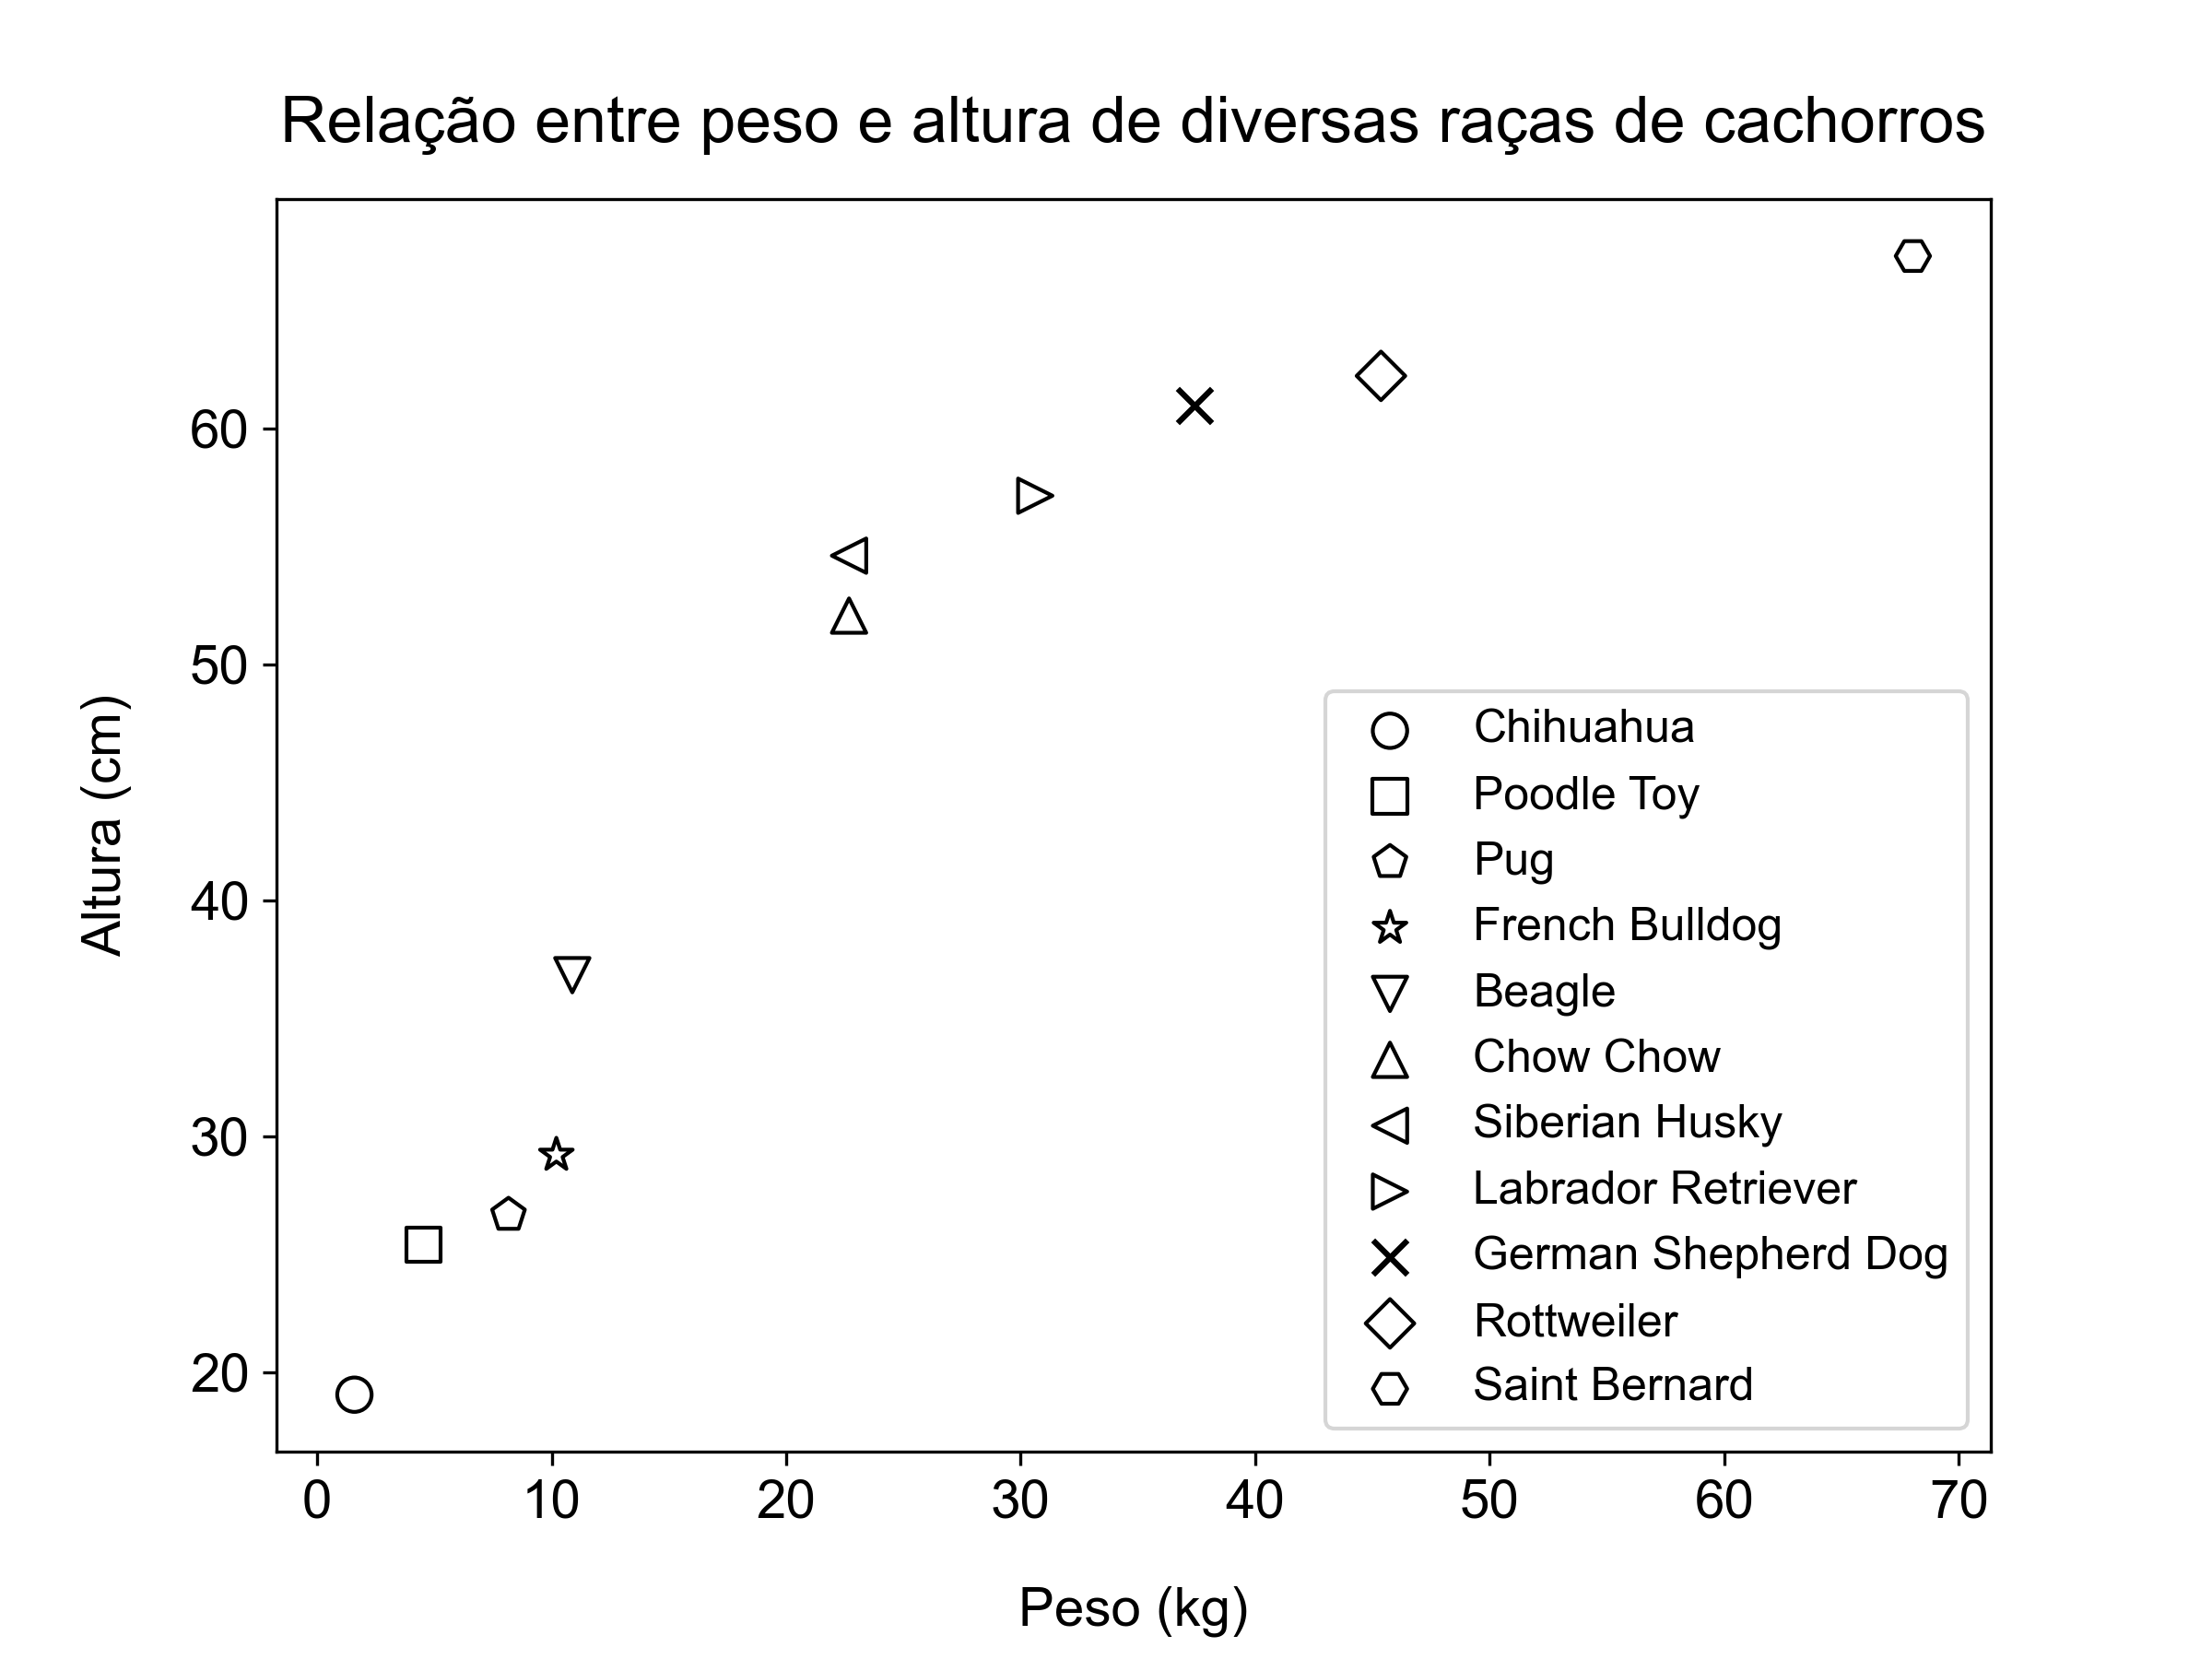
</div>

<br>

### Índice


<br>
    
- [Versões](#versoes-id)

- [Introdução](#intro-id)

- [Importações](#imports-id)

- [Conjunto de dados](#data-id)

- [Gráfico de dispersão](#grafico-dispersao-id)

- [Tamanho do Gráfico](#tamanho-figura-id)

- [Editando os pontos do gráfico](#editando-pontos-id)

    * [Cor do marcador](#editando-cor-marcador-id)
    
    * [Tamanho do marcador](#editando-tamanho-marcador-id)

    * [Tipo de marcador](#editando-tipo-marcador-id)

    * [Cor da linha do marcador](#editando-borda-marcador-id)

    * [Espessura da linha do marcador](#editando-borda-espessura-marcador-id)

- [Elementos de texto](#elementos-texto-id)

    * [Legendas](#elementos-texto-legendas-id)
    
        + [posição da legenda no gráfico](#elementos-texto-legendas-posicao-id)
        
    * [Título no eixo x](#elementos-texto-titulo-x-id)
    
    * [Título no eixo y](#elementos-texto-titulo-y-id)
    
    * [Título no gráfico](#elementos-texto-titulo-grafico-id)
    
    * [Tipos de fontes](#elementos-texto-fonte-id)

    * [Tamanho da fontes](#elementos-texto-fonte-tamanho-id)


- [Diversas séries](#elementos-diversas-series-id)



- [Exportando o gráfico](#elementos-exportacao-id)

    * [DPI's](#elementos-exportacao-dpis-id)
    
    * [Transparência](#elementos-exportacao-transparencia-id)




- [Sobre](#sobre-id)

- [Bibliografia](#citations-id)


---

<a id="versoes-id"></a>

## Versões das bibliotecas utilizadas

### Python

```python
import platform
print('Python version: ' + platform.python_version())
```
Python version: 3.7.3

### IPython

```python
import IPython
print('IPython version: ' + IPython.__version__)
```
IPython version: 7.22.0

### matplotlib

```python
import matplotlib as mpl
print('matplotlib version: ' + mpl.__version__)
```
matplotlib version: 3.3.4

<br>

<p style="text-align: center; font-size: 24px; color: #9f2f37; font-weight:bold">IMPORTANTE</p>

<br>

Para uma melhor experiência de aprendizado, **rode a célula abaixo** e ***clique no link*** que irá aparecer no ***output*** da célula para esconder o código. Esta célula contém os scripts utilizados para gerar as reflexões feitas ao longo do notebook, e não tem ligação direta com o aprendizado pretendido nesta aula.

<br>

<p style="text-align: right">🎵 <a href="https://www.youtube.com/watch?v=q-t3FXjHfsU">You can look for answers but that ain't fun</a> 🎵</p>




In [ ]:
import ipywidgets as widgets
import sys
from IPython.display import HTML
from IPython.display import display as reflexao
from IPython.display import clear_output
import random

# source: https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Visualizar código / Esconder código'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

def create_multipleChoice_widget(description, options, explanation):

    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        
        
        if "Correto! " in explanation[a]:
            first_line, second_line = '\x1b[1;30;42m' + explanation[a][:9] + "\n" , explanation[a][9:]
        elif "Incorreto! " in explanation[a]:
            first_line, second_line =  '\x1b[1;30;41m' + explanation[a][:11] + "\n" , explanation[a][11:]
            
        elif "Correto, mas fora de contexto! " in explanation[a]:
            first_line, second_line =  '\x1b[1;30;41m' + explanation[a][:31] + "\n" , explanation[a][31:]
        else:
            first_line, second_line =  'Pergunta', 'Mal formulada'
        

        with feedback_out:
            clear_output()
            print(first_line)
            print('\033[0m' + second_line)
        return
    
    check = widgets.Button(description="Enviar")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])


## Reflexão 1
pergunta_1 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_1 = ['a', 'b', 'c', 'd']
explicacoes_1 = ['Correto! Está é a ordem ideal para desenhar um gráfico utilizando o matplotlib',
                'Incorreto! Apesar desta ordem gerar um gráfico, os parâmetros passados em plt.figure() não serão utilizados.',
                 'Incorreto! Apesar desta ordem gerar um gráfico, os parâmetros passados em plt.figure() não serão utilizados.',
                 'Incorreto! A parte "pyplot" esta inserida dentro do matplotlib, e não ao contrário!']
Q1 = create_multipleChoice_widget(pergunta_1, opcoes_1, explicacoes_1)


## Reflexão 2
pergunta_2 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_2 = ['a', 'b', 'c', 'd']
explicacoes_2 = ['Incorreto! Apesar de não ser a forma mais usual, esta também é uma forma de importar a parte gráfica da biblioteca matplotlib!',
                'Incorreto! Apesar do alias "cafezinho" não ter relação nenhuma com a geração de gráficos, esta forma irá importar a parte gráfica do matplotlib de forma correta!',
                 'Incorreto! Embora seja uma forma pouco eficiente (pois será necessário escrever mpl.pyplot muitas vezes), esta forma irá importar a parte gráfica do matplotlib de forma correta!',
                 'Correto! Não existe a biblioteca "pyplot"!']
Q2 = create_multipleChoice_widget(pergunta_2, opcoes_2, explicacoes_2)


## Reflexão 3
pergunta_3 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_3 = ['a', 'b', 'c', 'd']
explicacoes_3 = ['Correto! Também é possível utilizar o parâmetro color, mas a forma abreviada é mais eficiente!',
                'Incorreto! O elemento plt.scatter() não tem o parâmetro cores',
                 'Incorreto! Apesar de que tomar um café é sempre uma boa ideia, não existe o parâmetro cafézinho em plt.scatter() e em nenhuma outra biblioteca do Python, pois acentos não são aceitos em nomes de variáveis/parâmetros/classes/funções, etc, sendo permitido apenas em strings',
                 'Correto! Também é possível utilizar o parâmetro c, que é mais eficiente!']
Q3 = create_multipleChoice_widget(pergunta_3, opcoes_3, explicacoes_3)


## Reflexão 4
pergunta_4 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_4 = ['a', 'b', 'c']
explicacoes_4 = ['Correto! Podemos passsar um número inteiro ou um número decimal (float)',
                'Correto! Podemos passsar número decimal ou um número inteiro (int)',
                 'Incorreto! Apenas números podem ser utilizados para alterar o tamanho dos marcadores']
Q4 = create_multipleChoice_widget(pergunta_4, opcoes_4, explicacoes_4)


## Reflexão 5
pergunta_5 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_5 = ['a', 'b', 'c']
explicacoes_5 = ['Correto, mas fora de contexto! Existe pelo menos uma empresa com o nome Marker (Marker International), mas no contexto do matplotlib, marker é o parâmetro utilizado para alterar o marcador (ou símbolo) utilizado para os pontos de um gráfico.',
                'Correto! É através do parâmetro marker que alteramos o tipo de marcador utilizado para desenhar os pontos de um gráfico.',
                'Incorreto! O parâmtro marker é utilizado para alterar o tipo do marcador. Para alterar o tamanho do marcador, utiliza-se o parâmetro s.']
Q5 = create_multipleChoice_widget(pergunta_5, opcoes_5, explicacoes_5)


## Reflexão 6
pergunta_6 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_6 = ['a', 'b', 'c', 'd']
explicacoes_6 = ['Incorreto! O parâmetro s altera o tamanho dos marcadores.',
                'Incorreto! O plt.scatter() não tem um parâmetro edge_colors.',
                'Correto! Esta é a forma correta de alterar a cor das "bordas" de um marcador para a cor verde.',
                'Incorreto! Apesar do parâmetro utilizado estar correto, as aspas simples utilizada para passar o nome da cor não foi fechada, o que resultará em um erro.']
Q6 = create_multipleChoice_widget(pergunta_6, opcoes_6, explicacoes_6)


## Reflexão 7
pergunta_7 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_7 = ['a', 'b', 'c']
explicacoes_7 = ['Incorreto! O plt.scatter() não tem um parâmetro para ligar os pontos do gráfico. Para isto, utilizamos o plt.plot().',
                'Incorreto! O parâmetro utilizado para alterar a cor das bordas é o edgecolors.',
                'Correto! O parâmetro linewidths altera a espessura da borda dos marcadores!']
Q7 = create_multipleChoice_widget(pergunta_7, opcoes_7, explicacoes_7)


## Reflexão 8
pergunta_8 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_8 = ['a', 'b', 'c']
explicacoes_8 = ['Incorreto! Apesar de passar "none" para o parâmetro facecolors deixa o marcador aberto, mas sem adicionar bordas no marcador, ele ficará todo transparente e não será possível ver ele no gráfico.',
                'Correto! Para deixar o marcador aberto precisamos adicionar cor à borda, e remover a cor da face do marcador.',
                'Incorreto! Ao passar a string "w" para facecolors, a cor do marcador ficará branca, e não aberto.']
Q8 = create_multipleChoice_widget(pergunta_8, opcoes_8, explicacoes_8)


## Reflexão 9
pergunta_9 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_9 = ['a', 'b', 'c', 'd']
explicacoes_9 = ['Incorreto! Apesar de de que imprimir o gráfico e adicionar a legenda manualmente seja plausível, a pergunta quer saber como adicionar a legenda utilizando o matplotlib.',
                'Incorreto! Apenas adicionar o plt.legend() apenas irá criar um elemento de legenda. É necessário adicionar o nome (label) para cada elemento do gráfico.',
                'Incorreto! Apenas adicionar o label em plt.scatter não irá criar um elemento de legenda.',
                'Correto! A legenda somente será adicionada ao gráfico caso o parâmetro label seja passado em plt.scatter() e o plt.legend() for adicionado após o plt.scatter().']
Q9 = create_multipleChoice_widget(pergunta_9, opcoes_9, explicacoes_9)


## Reflexão 10
pergunta_10 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_10 = ['a', 'b', 'c']
explicacoes_10 = ['Incorreto! O parâmetro pad esta correto, mas ele deve ser passado em plt.title() ao invés de plt.xlabel()',
                'Incorreto! O parâmetro labelpad adiciona espaçamento ao título dos eixos, e não aos título do gráfico.',
                'Correto! Esta é a forma correta de adicionar espaçamento ao título de um gráfico no matplotlib']
Q10 = create_multipleChoice_widget(pergunta_10, opcoes_10, explicacoes_10)


## Reflexão 11
pergunta_11 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_11 = ['a', 'b', 'c', 'd']
explicacoes_11 = ['Incorreto! Não existe o método matplotlib.Arial()!',
                'Incorreto! Não existe o método matplotlib.Arial()!',
                'Correto! Esta é uma das formas de alterar o tipo de fonte no matplotlib!',
                'Incorreto! Apesar do comando estar correto, esta faltando fechar as aspas no final da linha.']
Q11 = create_multipleChoice_widget(pergunta_11, opcoes_11, explicacoes_11)


## Reflexão 12
pergunta_12 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_12 = ['a', 'b', 'c']
explicacoes_12 = ['Correto! Os elementos devem ser adicionados antes do plt.show().',
                'Incorreto! Desta forma, a cada sequência um novo gráfico será desenhado!',
                'Incorreto! Passar diversas séries para o parâmetro y irá levantar um erro!']
Q12 = create_multipleChoice_widget(pergunta_12, opcoes_12, explicacoes_12)


## Reflexão 13
pergunta_13 = 'Escolha a opção correta (pode existir mais de uma resposta correta)'
opcoes_13 = ['a', 'b', 'c', 'd']
explicacoes_13 = ['Incorreto! O plt.scatter() não tem o parâmetro tight!',
                'Incorreto! O plt.Figure() não tem o parâmetro tight!',
                'Incorreto! O parâmetro bbox_inches não aceita valores boleanos!',
                 'Correto! Esta é uma das formas de deixar o gráfico com espaçamento justo!']
                 
Q13 = create_multipleChoice_widget(pergunta_13, opcoes_13, explicacoes_13)

hide_toggle()

<a id="intro-id"></a>

## Introdução

Os gráficos de dispersão são uma forma de representar graficamente a associação entre pares de dados (*x* e *y*). O pareamento de x e y esta relacionado a diferentes caracteristicas de um objeto.

Para desenha-lo, utilizamos dados vinculados a uma observação. Por exemplo, a hora do dia e a temperatura registrada em uma hora específica. Outro exemplo, a relação entre o número de rotações de um ventilador dependendo da velocidde setada.

Genericamente, temos uma variável X e uma variávle Y, que tem o mesmo tamanho. Os dados de X geralmente estão relacionados a uma medida independete, enquanto que os dados de Y estão relacionados a uma medida dependente (de X).

Por exemplo, o número de rotações do ventilador é dependente (variável Y) da velocidade escolhida (varáivel X).  A temperatura ambiente (variável Y) é dependente da hora (variável X) em que a medida foi feita.

Mas também podemos relacionar variáveis que não apresentam essa relação direta. Por exemplo, a umidade relativa do ar e a temperatura ambiente. Embora relacionadas, não é possível ajustar uma para medir a outra. 

O ***principal objetivo*** deste documento é trazer as principais **formas de edição** dos gráficos de dispersão utilizando a biblioteca [matplotlib](https://matplotlib.org/). Ela é a principal ferramenta utilizada para gerar gráficos no Python, e que permite a edição de cada detalhe do gráfico, e por isso foi escolhida.



<a id="imports-id"></a>

## Importações

Vamos começar importando a biblioteca matplotlib para o ambiente de trabalho:

- *matplotlib* para desenhar/plotar os gráficos

<br>

[Voltar ao topo](#title-id)

In [ ]:
import matplotlib.pyplot as plt

---

<a id="data-id"></a>

## Conjunto de dados

<br>

<img style="float: center;" src="https://hypescience.com/wp-content/uploads/2010/07/cachorros.jpg" alt="Gráfico de dispersão" width="300">

<p style="text-align: center;" >Fonte: <a href="https://hypescience.com/como-criar-um-cachorro-grande-em-um-pequeno-apartamento/">www.hypescience.com</a></p>

<br>

Para exemplificação de como gerar gráficos de dispersão, vamos utilizar um conjunto de dados que relaciona a **altura** (em cm) com o **peso** (em kg) de diversas ***raças de cachorros***. Os valores utilizados são os *valores médios* dentro de cada raça.

Os dados de **peso** foram atribuidos à variavel *x* utilizando uma *list*, e os dados da **altura** foram atribuidos à variável *y*, também utilizando uma *list*. As respectivas raças de cachorro foram amarzenadas na lista *raca_cachorro*.

Os dados estão ***ordenados*** da raça mais leve para a mais pesada.

Por favor, visite [esta página](https://www.dimensions.com/collection/dogs-dog-breeds) para ter acesso aos dados originais.

<br>


In [ ]:
x = [1.59, 4.53, 8.16, 10.2, 10.88, 22.68, 22.68, 30.62, 37.42, 45.36, 68.04] # peso em kilos

y = [19.05, 25.4, 26.67, 29.21, 36.83, 52.07, 54.61, 57.15, 60.96, 62.23, 67.31] # altura em em centímetros

raca_cachorro = ['Chihuahua', 'Poodle Toy', 'Pug', 'French Bulldog', 'Beagle', 'Chow Chow', 'Siberian Husky', 
                 'Labrador Retriever', 'German Shepherd Dog', 'Rottweiler', 'Saint Bernard'] # nome da respectiva raça 

[Voltar ao topo](#title-id)


---

<a id="grafico-dispersao-id"></a>

## Criando o gráfico de dispersão

O método utilizado para desenhar um [gráfico de dispersão no matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) é o método ```plt.scatter()```, que necessita de pelo menos dois parâmetros:

- *x*: dados que serão utilizados no o eixo x, que devem ser uma sequência (*list*, *tuple*, *ndarray*, etc);
- *y*: dados que serão utilizados no o eixo y, que devem ser uma sequência (*list*, *tuple*, *ndarray*, etc);

A estrutura mínima para desenhar um gráfico de dispersão é:

```python
plt.scatter(x,y)
plt.show()
```

Onde o
```python
plt.scatter(x,y)
```

é o resposável por gerar o gráfico, enquanto que 

```python
plt.show()
```

é o responsável por apresentar o gráfico. 

In [ ]:
plt.scatter(x=x, y=y)
plt.show()

Entretanto, o ```plt.show()``` não é necessário nos notebooks, pois o gráfico sempre será impresso no output da célula:

In [ ]:
plt.scatter(x=x, y=y)

Mas será impressa a *representação do objeto* de gráfico criado, o que em muitas vezes não é interessante. Além disso, em diversas outras [IDE's (Ambiente Integral de Desenvolvimento)](https://en.wikipedia.org/wiki/Integrated_development_environment), como o [PyCharm](https://www.jetbrains.com/pycharm/) ou o [Atom](https://atom.io/), o gráfico não será apresentado. Por estes motivos, é recomendado sempre utilizar o ```plt.show()```.
 
De qualquer forma, podemos editar este gráfico para que ele fique mais elegante e apresentavel. Uma das principais edições que podemos fazer é aterar o tamanho do gráfico.

[Voltar ao topo](#title-id)

---

<a id="tamanho-figura-id"></a>

## Tamanho do Gráfico

O tamanho do gráfico pode ser alterado utilizando o método ```plt.figure()```. Este método tem com função criar uma nova figura, e nele podemos alterar diversos parâmetros, como a cor de fundo do gráfico, cor das bordas, e o tamanho do gráfico.

Para alterar o tamanho do gráfico, precisamos passar uma *tupla* com dois elementos para o parâmetro ```figsize()```:

```
plt.figure(figsize=(x, y))
```

- O valor de *x* corresponde ao tamanho (em polegadas) da largura do eixo *x*. 

- Já o valor de *y*, corresponde ao tamanho (em polegadas) da altura do eixo *y*. 

Por padrão, o gráfico é criado com 6.4 polegadas de largura e 4.8 polegadas de altura:

```
plt.figure(x,y, figsize=(6.4, 4.8))
```

[Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

Para desenhar um gráfico **quadrado**, basta utilizar valores de *x* e *y* iguais:


In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x=x, y=y)
plt.show()

<br>

Para desenhar um gráfico mais largo, basta utilizar um valor de *x* **maior** do que o valor de *y*:

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x=x, y=y)
plt.show()

<br>

E para desenhar um gráfico mais alto, basta utilizar um valor de *x* **menor** do que o valor de *y*:

In [ ]:
plt.figure(figsize=(6,12))
plt.scatter(x=x, y=y)
plt.show()

<br>

Observe a ordem em que os elementos foram adicionados:


```python
plt.figure(figsize=(6,12))
plt.scatter(x=x, y=y)
plt.show()
```

Inicialmente, criamos a figura, depois desenhamos os pontos, e por fim apresentamos o gráfico. A ideia é simular o desenho de um quadro, onde incialmente conseguimos a tela de desenho (ou *canvas*), depois *pintamos* o quadro (adicionamos os elementos), e por fim *apresentamos o quadro* para outras pessoas (exportamos o gráfico).

Esta estrutura vai ***sempre se repetir*** (não apenas em um gráfico de dispersão, mas em todos os tipos de gráficos que vamos aprender ao longo deste curso), sendo adicionado mais elementos entre ***criar o canvas*** e ***apresentar a figura***. 

Vamos ver as principais formas de editar um gráfico.



---

<br>

### Momento para reflexão

***Qual ordem correta para gerar um gráfico de dispersão no matplotlib?***.

a) criar canvas, adicionar elementos, apresentar o gráfico

b) adicionar elementos, criar canvas, apresentar o gráfico

c) adicionar elementos,  apresentar o gráfico, criar canvas

d) criar o canvas,  tomar um cafézinho, apresentar o gráfico


In [ ]:
reflexao(Q1)

***Qual opção não irá importar a parte gráfica da biblioteca matplotlib?***

a) from matplotlib import pyplot as plt

b) import matplotlib.pyplot as cafezinho

c) import matplotlib as mpl

d) import pyplot.matplotlib as plt


In [ ]:
reflexao(Q2)

[Voltar ao topo](#title-id)

---

<a id="editando-pontos-id"></a>

## Editando os pontos do gráfico

As edições dos pontos do gráfico são feitas através de alguns parâmetros passados no comando onde é criado o gráfico (neste caso, o ```plt.scatter()```).

As principais edições geralmente feitas são:

- [Alterar cor do marcador](#editando-cor-marcador-id);

- [Alterar o tamanho do marcador](#editando-tamanho-marcador-id);

- [Alterar o tipo de marcador](#editando-tipo-marcador-id);

- [Alterar a cor da linha do marcador](#editando-borda-marcador-id);

- [Alterar a espessura da linha do marcador](#editando-borda-espessura-marcador-id);

- [Alterar a cor de preenchimento do marcador](#editando-cor-preenchimento-marcador-id);



<a id="editando-cor-marcador-id"></a>

### Alterando a cor do marcador


Adicionar cores em um gráfico é uma das formas mais eficientes para expressar o que o gráfico deve representar. 

Para alterar a cor dos marcadores, devemos passar o parâmetro ```color``` ou apenas ```c```, para o ```plt.scatter()```. Este parâmetro deve receber o nome da cor em formato de *string*.

Por exemplo, para deixar os pontos do gráfico preenchidos na cor preta, devemos utilizar:
```python
...
plt.scatter(x, y, c="black")
...
```


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y, color="black")
plt.show()

<br>

De forma análoga, mas utilizando a abreviação ```c = "black"```:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y, c="black")
plt.show()

<br>

Através deste parâmetro (```c``` ou ```color```) passamos uma *string* que represente o nome da cor desejada. Para as cores primárias (abaixo), também temos opção de utilizar uma abreviação do nome da cor.

<br>

- b (azul);
- g (verde);
- r (vermelho);
- c (ciano);
- m (magenta);
- y (amarelo);
- k (preto);
- w (branco);


Exemplo: marcadores na cor magenta.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y, c="m")
plt.show()

<br>

Também podemos passar uma sequência (*list*, *tuple*, *ndarray*, etc) com diversas cores para alterar cada ponto do gráfico. Cada elemento desse array deve conter uma *string* com o nome da cor desejada para cada ponto. O tamanho deste array deve coincidir com o número de pontos do gráfico.

Por exemplo, dado esta sequência de cores:

In [ ]:
cores = ['k', 'k', 'b', 'b', 'y', 'y', 'm', 'r', 'r', 'g', 'g']

Podemos alterar a cor de cada ponto, pois o tamanho da lista ```cores``` é o mesmo da lista ```x```

In [ ]:
len(cores) == len(x)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y, c=cores)
plt.show()

---

<br>

### Momento para reflexão

***Qual é o parâmetro utilizado para alterar a cor dos marcadores ao gerar um elemento de plt.scatter()?***

a) c;

b) cores;

c) cafézinho;

d) color;

In [ ]:
reflexao(Q3)

<br>

Você encontra uma lista com todas as cores disponíveis [neste link aqui](https://matplotlib.org/stable/gallery/color/named_colors.html) 

[Voltar ao topo](#title-id)
    
---

<a id="editando-tamanho-marcador-id"></a>

### Alterando o tamanho do marcador

O parâmetro que deve ser passado para alterar o tamanho dos marcadores é o parâmetro ```s```, que deve receber um número inteiro (*int*) ou decimal (*float*), sendo que valor o padrão é 20.

Por exemplo, para deixar os macadores menores (do que o padrão):


In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 10) 
plt.show()

### Observação:

Observe que na célula acima, os valores de x e y foram passados diretamante para o ```plt.scatter()```. Antes, era feito desta forma:

```python
plt.scatter(x=x, y=y)
```
E agora foi feito desta forma:

```python
plt.scatter(x, y)
```

A segunda forma é mais eficiente, mas resulta no mesmo valor. Mas observe que isto funciona pois estou passando os valores de *x* e *y* na ordem esperada pelo ```plt.scatter()```. Caso fosse feito desta forma:

```python
plt.scatter(y, x)
```
Os valores de *y* seriam utilizados no eixo x, e os valores de x seriam utilizados no eixo *y*. Mas a forma abaixo estaria correta, pois estou efetivamente falando qual parâmetro esta sendo alterado.

```python
plt.scatter(y=y, x=x)
```


 Para deixar os macadores maiores (do que o padrão):

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 100.1) 
plt.show()

<br>

Também pode passar uma sequência (*list*, *tuple*, *ndarray*, etc) para o parâmetro ```s```, onde cada elemento deve ser um número correspondente ao tamanho do marcador.

Este array deve ter o mesmo tamanho que o número de pontos do gráfico.

Por exemplo, a lista ```tamanhos```:

In [ ]:
tamanhos = [40, 40, 50, 50, 60, 10, 10, 100, 100, 150, 150]

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = tamanhos) 
plt.show()

Observe que a lista ```tamanhos``` e ```x``` tem o mesmo número de elementos:

In [ ]:
len(tamanhos) == len(x)

---

<br>

### Momento para reflexão

***Qual é o tipo de variável que deve ser passado através do parâmetro s para o plt.scatter() para alterar o tamanho do marcador?***

a) int;

b) float;

c) string;

In [ ]:
reflexao(Q4)

[Voltar ao topo](#title-id)
    
---

<a id="editando-tipo-marcador-id"></a>

### Alterando o tipo de marcador

Para alterar o tipo do marcador utilizamos o parâmetro ```marker```, que deve receber uma *string* contendo o símbolo desejado ou um número inteiro (*int*) da lista de referências de marcadores.

Os marcadores mais utilizados são:

- " . " (ponto);
- " o " (circulo);
- " v " (triângulo para cima);
- " s " (quadrado);
- "\ * " (estrela);
- " D " (diamante);
- " + " (mais);

Na Figura abaixo você pode visualizar todos os marcadores disponíveis:



<img style="float: center;" src="https://raw.githubusercontent.com/andersonmdcanteli/matplotlib-course/main/auxiliary-scripts/matplotlib-all-markers/matplotlib_markers.png" alt="Gráfico de dispersão mostrando os diferentes maracadores" width="800">


O script utilizado para desenhar o gráfico acima pode ser acessado [neste link](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/auxiliary-scripts/matplotlib-all-markers/matplotlib-all-markers.ipynb).

[Documentação](https://matplotlib.org/stable/api/markers_api.html).


Por exemplo, para deixar os marcadores em formato de diamante:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 100.1, marker = "D") 
plt.show() 

---

<br>

### Momento para reflexão

***O que é um marker?***

a) Uma empresa;

b) Parâmetro utilizado para alterar o simbolo do marcador em um gráfico do matplotlib

c) Parâmetro utilizado para alterar o tamanho do marcador em um gráfico do matplotlib



In [ ]:
reflexao(Q5)

<br>

[Voltar ao topo](#title-id)
    
---

<a id="editando-borda-marcador-id"></a>

### Alterando a cor da linha do marcador (bordas do marcador)

Também é possível alterar a cor das linhas (bordas) dos marcadores de forma bem simples, bastando passar o nome da cor desejada (como uma *string*) através do parâmetro ```edgecolors```. As cores seguem o mesmo padrão apresentado no item [Alterando a cor do marcador](#editando-cor-marcador-id).

Por exemplo, para deixar a borda na cor preta:


In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 100.1, marker = "D", edgecolors = 'k') 
plt.show() 

<br>

Também podemos passar uma sequência de elementos (*list*, *tuple*, *ndarray*, etc) com os nomes das cores para alterar a cor da borda de cada ponto do gráfico.

Utilizando a lista ```cores``` criada anteriormente:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 100.1, marker = "D", edgecolors = cores) 
plt.show() 

---

<br>

### Momento para reflexão

***Qual linha de comando alteraria a cor da borda de um marcador para a cor verde?***

a) plt.scatter(x, y, s='g')

b) plt.scatter(x, y, edge_colors='g')

c) plt.scatter(x, y, edgecolors='g')

d) plt.scatter(x, y, edgecolors='g)


In [ ]:
display(Q6)

<br>

[Voltar ao topo](#title-id)
    
---

<a id="editando-borda-espessura-marcador-id"></a>

### Alterando a espessura da linha do marcador (espessura da borda)


Também é possível alterar a espessura da borda dos marcadores, o que é feito passando um número inteiro (*int*) ou decimal (*float*) através do parâmetro ```linewidths```.

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 100.1, marker = "D", edgecolors = cores, linewidths=2.5) 
plt.show() 

Também podemos passar uma sequência (*list*, *tuple*, etc) com diversos valores para a espessura das bordas:

In [ ]:
espessura_marcador = [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3.0]
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c='red', s = 100.1, marker = "D", edgecolors = cores, linewidths=espessura_marcador) 
plt.show() 

---

<br>

### Momento para reflexão

***Qual a função do parâmetro linewidths quando passado para o plt.scatter()?***

a) Adicionar uma linha entre os pontos;

b) Alterar a cor da borda dos marcadores;

c) Alterar a espessura da borda dos marcadores;




In [ ]:
reflexao(Q7)

<br>

[Voltar ao topo](#title-id)
    
---

<a id="editando-cor-preenchimento-marcador-id"></a>

### Alterando a cor de preenchimento do marcador

É possível alterar a cor de dentro (interior) dos marcadores, o que é feito passando o nome da cor desejada através do parâmetro ```facecolors```. As cores seguem o mesmo padrão apresentado no item [Alterando a cor do marcador](#editando-cor-marcador-id).

Entretanto, não devemos passar o parâmetro ```color```, pois ele tem prioridade mais elevada no código e irá sobrescrever as cores.

Por exemplo, se adicionarmos o ```facecolors='g'``` no gráfico que estamos construindo, não teremos mudanças visuais no gráfico:


In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, c = 'red', s = 100.1, marker = "D", edgecolors = 'k', facecolors='g') 
plt.show() 

Como passamos o parâmetro ```facecolors='g'```, era esperado que as cores das faces ficassem verdes, o que não aconteceu.

Mas se removermos o parâmetro ```c```, obtemos a cor verde:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='g') 
plt.show() 

<br> 

Também podemos passar uma sequência de elementos (*list*, *tuple*, *ndarray*, etc) com os nomes das cores para alterar a cor de preenchimento de cada marcador do gráfico.

Utilizando a lista cores criada anteriormente:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors=cores) 
plt.show() 

<br>

Caso queira o marcador aberto, basta passar ```facecolors = "none"```. Observe que é ```none```, com n minusculo, e não ```None```.

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none') 
plt.show() 

---

<br>

### Momento para reflexão

***Como deve ser passado para deixar o marcador aberto em plt.scatter?***

a) plt.scatter(x,y, facecolors='none')

b) plt.scatter(x,y, facecolors='none', edgecolors='k')

c) plt.scatter(x,y, facecolors='w', edgecolors='k')


In [ ]:
reflexao(Q8)

<br>

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-id"></a>

## Adicionando elementos de texto

Podemos adicionar diversos elementos textuais nos gráficos de forma bem simples. Os principais são:

- [Legendas](#elementos-texto-legendas-id)

    * [Posição da legenda no gráfico](#elementos-texto-legendas-posicao-id)
    
    * [Tamanho da fonte da legenda no gráfico](#elementos-texto-legendas-tamanho-fonte-id)

- [Título no eixo x](#elementos-texto-titulo-x-id)

- [Título no eixo y](#elementos-texto-titulo-y-id)

- [Título no gráfico](#elementos-texto-titulo-grafico-id)

- [Tipos de fontes](#elementos-texto-fonte-id)

- [Tamanho da fontes](#elementos-texto-fonte-tamanho-id)


<a id="elementos-texto-legendas-id"></a>

### Adicionando legendas

Para adicionar ***legendas*** em um gráfico, precismos adicionar o parâmetro ```label``` ao ```plt.scatter()``` que irá indicar qual *nome* que será inserido na legenda.

Também precisamos adicionar o ```plt.legend()```, que irá efetivamente criar a legenda e adicionar ela a figura criada. Este último parâmetro deve estar posicionado após o ```plt.scatter()``` e antes de ```plt.show()```.

Então, precisamos da sequinte estrutura:

```python
plt.figure() 
plt.scatter(label="Nome da legenda") 
plt.legend()
plt.show() 
```

Por exemplo, caso for adicionado apenas o parâmetro ```label``` em ```plt.scatter()```:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.show() 

obtemos o gráfico sem as legendas. Mas ao adicionar o ```plt.legend()``` após o ```plt.scatter()```:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend() 
plt.show() 

Obtemos as legendas corretamente.

<br>

Mas observe que, se o ```plt.legend()``` estiver antes de ```plt.scatter()```

In [ ]:
plt.figure(figsize=(8,6)) 
plt.legend() 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.show() 

In [ ]:
plt.legend() 
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.show() 

ou depois de ```plot.show()```

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.show() 
plt.legend() 

as legendas não serão inseridas.

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-legendas-posicao-id"></a>

#### Posição da legenda no gráfico


Podemos especificar o local em que a legenda será inserida no gráfico, o que é feito passando a **posição** desejada através do parâmetro ```loc``` em ```plt.legend()```. Esta posição pode ser definida através de uma *string* ou através de um número *int* que se refere a posição desejada. 

Temos 10 posições disponíveis, sendo que a ```loc='best'``` é a padrão:

- 'best', que corresponde ao código 0, e a legenda é posicionada na melhor posição definida por um algoritmo (valor padrão);
- 'upper right', que corresponde ao código 1, e a legenda é posicionada no canto superior direito;
- 'upper left', que corresponde ao código 2, e a legenda é posicionada no canto superior esquerdo;
- 'lower left', que corresponde ao código 3, e a legenda é posicionada no canto inferior esquerdo;
- 'lower right', que corresponde ao código 4, e a legenda é posicionada no canto inferior direito;
- 'right', que corresponde ao código 5, e a legenda é posicionada no canto direito;
- 'center left', que corresponde ao código 6, e a legenda é posicionada no centro a esquerda;
- 'center right', que corresponde ao código 7, e a legenda é posicionada no centro a direita;
- 'lower center', que corresponde ao código 8, e a legenda é posicionada no centro inferior;
- 'upper center', que corresponde ao código 9, e a legenda é posicionada no centro superior;
- 'center', que corresponde ao código 10, e a legenda é posicionada no centro do gráfico;

<br>

Visualmente:

<br>

<img style="float: center;" src="https://raw.githubusercontent.com/andersonmdcanteli/matplotlib-course/main/auxiliary-scripts/matplotlib-all-legend-positions/legend-positions.png" alt="Gráfico apresentando as posiçoespadrão disponíveis para alocar a legenda" width="800">

O notebook utilizado para desenhar a imagem acima pode ser acessado [clicando aqui](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/auxiliary-scripts/matplotlib-all-legend-positions/matplotlib-legend-positions.ipynb).

Por exemplo, para deixar a legenda no centro do gráfico, podemos utilizar ```loc='center'```:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend(loc = 'center') 
plt.show() 

ou, de forma análoga mas utilizando um número, ```loc=10```:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend(loc=10) 
plt.show() 

<br>

Também temos a possibilidade de **especificar a posição** da legenda de forma ***arbitrária***, o que é feito passando uma *tupla* com a posição em *x* e *y* desejada através do parâmetro ```bbox_to_anchor``` em ```plt.legend()```.

Por exemplo, em x = 0 e y = 0:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend(bbox_to_anchor=(0,0)) 
plt.show() 

<br>

Já em  x = 1 e y = 0.5:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend(bbox_to_anchor=(1,0.5))
plt.show() 

<br>

E também podemos colocar a legenda para fora do gráfico:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend(bbox_to_anchor=(1.02,1)) 
plt.show() 

Você encontra mais detalhes sobre o posicionamento das legendas [na documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-legendas-tamanho-fonte-id"></a>

#### Tamanho da fonte da legenda no gráfico

Também podemos alterar o tamanho da fonte da legenda diretamente em ```plt.legend()```. Basta passar um número (*int* ou *float*) para o ```plt.legend()``` através do parâmetro ```fontsize```:


In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend(bbox_to_anchor=(1.02,1), fontsize=20) 
plt.show() 

---

<br>

### Momento para reflexão

***Como adicionar legenda em um gráfico de dispersão no matplotlib?***

a) Imprimindo o gráfico e escrevendo com uma caneta

b) Adicionando o plt.legend() após a adição do plt.scatter()

c) Passando o parâmetro label em plt.scatter() com o nome que será utilizado na legenda.

d) combinando as respostas b e c


In [ ]:
reflexao(Q9)

<a id="elementos-texto-titulo-x-id"></a>

### Adicionando título ao eixo x

Para adicionar um título ao eixo *x*, utilizamos o ```plt.xlabel()```, passando como uma *string* o texto que será adicionado ao título do eixo *x*. O ```plt.xlabel()``` precisa estar posicionado antes de ```plt.show()```:

```python
plt.figure()
...
plt.xlabel()
plt.show()
```

Por exemplo:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)") 
plt.show() 

<br>

Podemos alterar o espaçamento entre o eixo *x* e o nome do eixo x, passando um número (*float* ou *int*) através do parâmetro ```labelpad```. O valor padrão é 4.0.

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)", labelpad=20.0) 
plt.show() 

<br>

Ainda podemos alterar a posição do título do eixo x através do parâmetro ```loc```. Temos três opções:

- 'center' (padrão): posiciona o título no centro do eixo *x*;
- 'right': posiciona o título à direita do eixo *x*;
- 'left': posiciona o título à esquerda do eixo *x*;

Por exemplo, para deixar o título do eixo *x* no canto direito:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)", labelpad=20, loc="right")
plt.show() 

[Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html).

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-titulo-y-id"></a>

### Adicionando título ao eixo y

Para adicionar um título ao eixo *y*, utilizamos o ```plt.ylabel()```, passando como uma *string* o texto que será adicionado ao título do eixo *y*. Assim como o ```plt.xlabel()```, o ```plt.ylabel()``` precisa esta posicionado antes de ```plt.show()```.

```python
plt.figure()
...
plt.ylabel()
plt.show()
```

Por exemplo:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)") 
plt.show() 

<br>

Podemos alterar o espaçamento entre o eixo *y* e o titulo do eixo *y*, passando um número (*float* ou *int*) através do parâmetro ```labelpad```. O valor padrão é 4.0.

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)", labelpad=25) 
plt.show() 

<br>

Ainda podemos alterar a posição do título do eixo y através do parâmetro ```loc```. Temos três opções:

- 'center' (padrão): posiciona o título no centro do eixo *x*;
- 'bottom': posiciona o título na base do eixo *x*;
- 'top': posiciona o título no topo do eixo *x*;

Por exemplo, para deixar o título do eixo *x* no topo direito:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)", labelpad=25, loc='top') 
plt.show() 

[Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-titulo-grafico-id"></a>

### Adicionando título ao gráfico

Para adicionar um título ao gráfico utilizamos o ```plt.title()```, passando como uma *string* o nome para o título. O ```plt.title()``` precisa esta posicionado antes de ```plt.show()```.

```python
plt.figure()
...
plt.title()
plt.show()
```

Por exemplo:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro") 
plt.show() 

<br>

Podemos alterar o espaçamento entre o título do gráfico e o topo do gráfico, passando um número (*float* ou *int*) através do parâmetro ```labelpad```. O valor padrão é 6.0.

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro", pad=40) 
plt.show() 

<br>

Ainda podemos alterar a posição do título do gráfico através do parâmetro ```loc```. Temos três opções:

- 'center' (padrão): posiciona o título no centro (em relação ao eixo x);
- 'right': posiciona o título à direita (em relação ao eixo x);
- 'left': posiciona o título à esquerda (em relação ao eixo x);

Por exemplo, para deixar o título do gráfico no lado direito:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro", pad=40, loc='right') 
plt.show() 

---

<br>

### Momento para reflexão


***Como adicionar espaçamento entre o título do gráfico e o gráfico?***

a) Passando o parâmetro pad em  plt.xlabel()

b) Passando o parâmetro labelpad em plt.title()

c) Passando o parâmetro pad em plt.title()



In [ ]:
reflexao(Q10)

[Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html).

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-fonte-id"></a>

### Tipos de fontes

Um ponto muito importante em um gráfico é o tipo (ou família) de fonte utilizada. Algumas revistas cinentíficas limitam as figuras em alguns tipos de fontes para garantir uma boa leitura do gráfico. Alterar a fonte utilizada nos elementos de texto e numéricos do gráfico do matplotlib é bem simples. 

É possível alterar de duas formas:

- alterar a fonte padrão de todos os elementos (recomendado);

- alterar a fonte de cada elemento;

A primeira forma é recomendada para evitar discrepâncias no gráfico. O gráfico é um elemento único, que tem uma mensagem a ser passada, e esta mensagem deve estar padronizada para não confundir o leitor. Em poucos casos será necessário alterar a fonte apenas um ou outro elemento, e então não irei abordar está possibilidade.

Para alterar a fonte padrão no matplotlib, podemos utilizar a classe ```rc``` do matplotlib. Através desta classe, podemos alterar qualquer configuração padrão do matplotlib (gerenciamento de backend).

Uma lista com todas as opções pode ser acessada [neste link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html)

Para alterar a fonte padrão, precisamos alterar o valor do tipo da família da fonte. Para alterar a fonte padrão (que é a **DejaVu Sans**) para a fonte **Arial**, podemos fazer da seguinte forma:

```python
matplotlib.rc('font', family = 'Arial')
```

O primeiro argumento ```font``` se refere a qual caracteristica será alterada. O argumento ```family``` se refere ao tipo de fonte que será utilizado.

Para utilizar esta ferramenta, precisamos importar a *root* do matplotlib:

In [ ]:
import matplotlib as mpl

E então aplicar o método:

In [ ]:
mpl.rc('font', family = 'Arial')

O que resulta no seguinte gráfico:

In [ ]:
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro", pad=40, loc='right') 
plt.show() 

Observe que todos os elementos de texto/numéricos agora estão na fonte Arial. Um incoveniente desta forma de alterar o fonte, é que para retornar ao padrão temos de aplicar o método novamente, mas com a fonte padrão (DejaVu Sans) ou reiniciar todo o notebook.

Para saber quais fontes temos disponíveis para utilizar, utilizamos o ```mpl.font_manager.get_fontconfig_fonts()```, que retorna uma lista com o caminho de todos os arquivos de fontes disponíveis. Mas para obter os nomes que são utilizados para alterar o tipo da fonte, podemos fazer desta forma:

In [ ]:
flist = mpl.font_manager.get_fontconfig_fonts()
names = [mpl.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
names

Como você pode observar, os nomes não estão ordenados, que dificulta a busca. Para ordenar os dados em uma lista, utilizamos o método ```sorted()```:

In [ ]:
names = sorted(names)
names

Mas repare que temos algumas fontes que estão repetidas. Para acessar apenas nomes de fontes únicas, podemos transformar a lista *names* em um *set*:

In [ ]:
fontes = set(names)
fontes

Desta forma, o *set* *fontes* tem todos os tipos de fontes diponíveis para editar o gráfio do matplotlib. Por curiosidade, temos que a quantidade total de fontes é:

In [ ]:
len(fontes)

### Observação:

O número de fontes disponíveis pode variar de acordo com a versão do matplotlib, versão do sistema operacional, versão do python, entre outros motivos.

Então, caso queira altear a fonte para 'Times New Roman', basta:

In [ ]:
mpl.rc('font', family = 'Times New Roman')

plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro", pad=40, loc='right') 
plt.show() 

[Voltar ao topo](#title-id)
    
---

<a id="elementos-texto-fonte-tamanho-id"></a>

### Tamanho da fonte

Outro ponto importante é o tamanho da fonte. As informações devem estar claras, e ter um tamanho de fonte adequado é essencial para isto. 

Também podemos alterar o tamanho da fonte diretamente em cada elemento (como fizemos para a legenda), mas é mais comum manter um tamanho padrão no gráfico todo. Então, para alterar o tamanho da fonte de todos os elementos gráficos, podemos aplicar o método ```mpl.rc()```novamente, mas agora passando o parâmetro ```size``` com um número correspondente ao tamanho de fonte dsejada. 

Por exemplo, passando ```size = 30```:

In [ ]:
mpl.rc('font', size = 30)

plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro", pad=40, loc='right') 
plt.show() 

Obtemos esse gráfico com o tamanho do texo muito grande. Um valor adequado geralmente gira em torno de 12, mas isto depende da fonte utilizada e do tamanho da figura.

In [ ]:
mpl.rc('font', size = 12)
plt.figure(figsize=(8,6)) 
plt.scatter(x,y, s = 100.1, marker = "D", edgecolors = 'k', facecolors='none', 
            label="Raças de cachorros") 
plt.legend()
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.title("Relação entre peso e altura de diversas raças de cachorro", pad=40, loc='right') 
plt.show() 

Uma boa prática é aplicar o método ```mpl.rc('font', family = 'string', size = number)``` logo no início do notebook ou na mesma célula do gráfico, de forma que ao rodar o script, a atualização dos valores padrão é feita automaticamente.

---

<br>

### Momento para reflexão

***Como alterar o tipo de fonte geral para Arial no matplotlib?***

a) Passando o parâmetro matplotlib.Arial() após criar o canvas da figura (plt.figure())

b) Passando o parâmetro matplotlib.Arial() após criar os elementos do gráfico (plt.scatter())

c) Setando a familia da fonte da seguinte forma: mpl.rc('font', family='Arial') antes de gera o gráfico

d) Setando a familia da fonte da seguinte forma: mpl.rc('font', family='Arial) antes de gera o gráfico



In [ ]:
reflexao(Q11)

[Voltar ao topo](#title-id)
    
---

<a id="elementos-diversas-series-id"></a>

## Diversas séries 


Em muitos casos vamos ter dois ou mais conjuntos de dados, ou seja, várias séries de *x* e *y*. No exemplo acima, com dados relacionando peso e altura dos cachorros, temos várias raças, e seria importante diferenciar as raças no gráfico.


Para adicionar mais de uma série em um gráfico de dispersão, basta adicionar um novo elemento de ```plt.scatter()``` com a nova série. 

Por exemplo, o gráfico de dispersão que relaciona peso e altura apenas para a raça Chihuahua (posição 0) é:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0])
plt.legend()
plt.show()

Já para a raça 'Poodle Toy' (posição 1):

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[1], y[1], label=raca_cachorro[1])
plt.legend()
plt.show()

Para juntar estes dois gráficos (como séries diferentes), combinamos dois elementos de ```plt.scatter()```, um após o outro:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0])
plt.scatter(x[1], y[1], label=raca_cachorro[1])
plt.legend()
plt.show()

Dessa forma, o matplotlib irá automaticamente diferenciar a cor do marcador das diferentes séries de dados. E podemos adicionar quantas séries quanto desejarmos:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0])
plt.scatter(x[1], y[1], label=raca_cachorro[1])
plt.scatter(x[2], y[2], label=raca_cachorro[2])
plt.scatter(x[3], y[3], label=raca_cachorro[3])
plt.scatter(x[4], y[4], label=raca_cachorro[4])
plt.scatter(x[5], y[5], label=raca_cachorro[5])
plt.scatter(x[6], y[6], label=raca_cachorro[6])
plt.scatter(x[7], y[7], label=raca_cachorro[7])
plt.scatter(x[8], y[8], label=raca_cachorro[8])
plt.scatter(x[9], y[9], label=raca_cachorro[9])
plt.scatter(x[10], y[10], label=raca_cachorro[10])
plt.legend()
plt.show()

---

<br>

### Momento para reflexão

***Como adicionar diversos elementos de dispersão no matplotlib?***

a) Adicionando vários elementos de plt.scatter() antes de apresentar o gráfico

b) Criando várias sequências de criação de gráficos (criar canvas, adicionar elemento, apresentar o gráfico)

c) Passando várias séries de dados através do parâmetro y em plt.scatter()



In [ ]:
reflexao(Q12)

## Desafio 1

Crie o mesmo gráfico acima, mas utilizando um loop for. São necessárias apenas 5 linhas.

Você pode acessar o notebook básico [clicando aqui](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/desafio-1/Desafio-1.ipynb) (mas tente criar um novo notebook do zero, e implementar todos os dados por conta própria).

O notebook com a resolução do desafio pode ser acessado [clicando aqui](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/desafio-1/Desafio-1-Resolucao.ipynb)

O vídeo da resolução do desafio 1 pode ser acessado [neste link](https://youtu.be/PziPMMthKY4)



### Edição do gráfico

Agora vamos editar o gráfico com as formas de edições que vimos para deixa-lo apresentavel.

Em geral, gráficos coloridos são bons para apresentações, mas não para artigos (a inclusão de figuras coloridas geralmente esta atrelado ao pagamento de uma taxa elevada). Então vou alterar a cor dos marcadores para preta:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], c='k')
plt.scatter(x[1], y[1], label=raca_cachorro[1], c='k')
plt.scatter(x[2], y[2], label=raca_cachorro[2], c='k')
plt.scatter(x[3], y[3], label=raca_cachorro[3], c='k')
plt.scatter(x[4], y[4], label=raca_cachorro[4], c='k')
plt.scatter(x[5], y[5], label=raca_cachorro[5], c='k')
plt.scatter(x[6], y[6], label=raca_cachorro[6], c='k')
plt.scatter(x[7], y[7], label=raca_cachorro[7], c='k')
plt.scatter(x[8], y[8], label=raca_cachorro[8], c='k')
plt.scatter(x[9], y[9], label=raca_cachorro[9], c='k')
plt.scatter(x[10], y[10], label=raca_cachorro[10], c='k')
plt.legend()
plt.show()

Mas desta forma, não tem como diferenciar as raças! Então, vou alterar o tipo de marcador para cada série:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], c='k', marker='o')
plt.scatter(x[1], y[1], label=raca_cachorro[1], c='k', marker='s')
plt.scatter(x[2], y[2], label=raca_cachorro[2], c='k', marker='p')
plt.scatter(x[3], y[3], label=raca_cachorro[3], c='k', marker='*')
plt.scatter(x[4], y[4], label=raca_cachorro[4], c='k', marker='v')
plt.scatter(x[5], y[5], label=raca_cachorro[5], c='k', marker='^')
plt.scatter(x[6], y[6], label=raca_cachorro[6], c='k', marker='<')
plt.scatter(x[7], y[7], label=raca_cachorro[7], c='k', marker='>')
plt.scatter(x[8], y[8], label=raca_cachorro[8], c='k', marker='x')
plt.scatter(x[9], y[9], label=raca_cachorro[9], c='k', marker='D')
plt.scatter(x[10], y[10], label=raca_cachorro[10], c='k', marker='H')
plt.legend()
plt.show()

Mas os marcadores estão pequenos, e vou altera-los. Como a mudança de tamanho é apenas para fins estéticos, é mais indicado que todos os marcadores tenham o mesmo tamanho. Então, vou criar uma varáivel ```marker_size``` que vai receber o valor do tamanho do marcador, e vou passar esta variável para o parâmetro ```s```. 

Dessa forma, todas as séries terão marcador do mesmo tamanho, e caso eu queira alterar o tamanho, eu não preciso ficar alterando em todos os locais, bastando alterar o valor de ```marker_size```

In [ ]:
marker_size = 80

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], c='k', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], c='k', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], c='k', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], c='k', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], c='k', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], c='k', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], c='k', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], c='k', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], c='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], c='k', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], c='k', marker='H', s = marker_size)
plt.legend()
plt.show()

Particularmente, eu prefiro os pontos abertos. Então:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='none', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend()
plt.show()

Observe que o marcador da raça 'German Shepherd Dog' acabou desaparecendo, o que aconteceu pois o marcador utilizado é um ```x```, e este marcador não tem ```edgecolor```. Para resolver isto, basta passar a cor preta para o parâmetro ```facecolor```:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend()
plt.show()

Agora vou adicionar os elementos de texto no gráfico:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend()
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.show()

 E por fim, vou alterar o tamanho das fontes e também a famila das fontes utilizando o ```mpl.rc()```. O tamanho da fonte da legenda eu vou alterar diretamente em ```plt.legend()```, pois ela acaba ficando maior do que eu gostaria.

In [ ]:
mpl.rc('font', family = 'Arial', size = 14)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("desafio_2.png")
plt.show()

E pronto, temos um gráfico de disperção corretamente editado.


## Desafio 2

Obtenha o gráfico acima com todas as edições utilizando um for loop.

O notebook base pode ser acessado [neste link](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/desafio-2/Desafio-2.ipynb)

O notebook com a resolução pode ser acessado [neste outro link](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/desafio-2/Desafio-2-final.ipynb)

O video com a resolução pode ser visto [clicando neste link]()

[Voltar ao topo](#title-id)
    
---

<a id="elementos-exportacao-id"></a>

## Exportando o gráfico

Para exportar um gráfico desenhado com o matplotlib utilizamos o ```plt.savefig()```, que deve ter como argumento o nome do arquivo que será criado, inclusive com a extensão desejada. O ```plt.savefig()``` deve ser adicionado logo acima de ```plt.show()```, e após todos os demais elementos terem sido criados.

```python
plt.figure()
...
plt.savefig()
plt.show()
```

Para saber quais tipos de extensões podem ser utilizadas, utilize o seguinte comando:

In [ ]:
plt.gcf().canvas.get_supported_filetypes()

No *dicionário* acima, temos a extensão possível como chave, e o nome da respectiva extesão no valor de cada chave.

<br>

Para exemplificar, vamos criar um arquivo com extensão ".png":

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("meu_arquivo_em_png.png")
plt.show() 

<br>

Confira no diretório local o arquivo exportado (o mesmo em que este arquivo está salvo). 

Para saber qual é o diretório em que o notebook está, podemos utilizar a biblioteca ```os```, e utilizar o método ```os.getcwd()```:

In [ ]:
import os
os.getcwd()

<br>

Vamos gerar um outro gráfico, mas com a extensão ".svg":

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("meu_arquivo_em_svg.svg") 
plt.close() 

<br>

Observe que, no código acima, o gráfico não foi apresentado. Isto aconteceu pois foi utilizado o ```plt.close()``` ao invés do ```plt.show()```, o que faz com que a figura não seja apresentada. Mas ainda assim, o arquivo foi exportado.

Um arquivo '.svg' é muito interessante, pois ele permite a mudança no tamanho do gráfico sem perda de qualidade!

[Voltar ao topo](#title-id)
    
---

<a id="elementos-exportacao-dpis-id"></a>

### Alterando o número de dpi's

Também podemos especificar a densidade de pixels (*dpi*) do gráfico, o que é feito passando um número (*float* ou *int*) através do parâmetro ```dpi```. A quantidade de *dpis* padrão é de 100 dpis.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("meu_arquivo_em_png.png", dpi=300) 
plt.show() 

Quanto maior o dpi, maior a qualidade final do gráfico, mas também maior será o tamanho do arquivo gerado.

[Voltar ao topo](#title-id)
    
---

<a id="elementos-exportacao-transparencia-id"></a>

### Adicionando transparência

Em alguns casos, especialmente para posters e banners, é interessante que o gráfico tenha trânsparência, de forma a facilitar em adicionar outros elementos no banner/poster. 

Para exportar o gráfico transparente, basta passar como ```True``` o parâmetro ```transparent``` em ```plt.savefig()```. Tudo que não foi especificamente preenchido com alguma cor ficará transparente.

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("scatter_plot_final.png", dpi=300, transparent='True')
plt.show() 

[Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

[Voltar ao topo](#title-id)
    
---

### Preenchimento das bordas externas

Um ponto importante, especialmente na hora de salvar os gráficos, é a área de preenchimento das bordas externas. Por padrão, esta área é transparente, mas podemos altera-la passado uma cor para o parâmetro ```facecolor``` em ```plt.figure()```:

In [ ]:
plt.figure(figsize=(8,6), facecolor='blue')
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("grafico_fundo_azul.png", dpi=100)
plt.show() 

Em alguns casos pode acontecer do gráfico exportado "corte" alguma parte do gráfico. Por exemplo, caso alterarmos a posição das legendas para fora do gráfico:

In [ ]:
plt.figure(figsize=(8,6), facecolor='blue')
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12, bbox_to_anchor=(1.,1.))
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("grafico_fundo_azul_legenda_fora_eixo.png", dpi=100)
plt.show() 

Visualmente, parece que o gráfico esta correto (pelo menos no output). Mas ao abrir o arquivo, obtemos ele incompleto (abra no seu navegador ou visualizador de fotos também!):

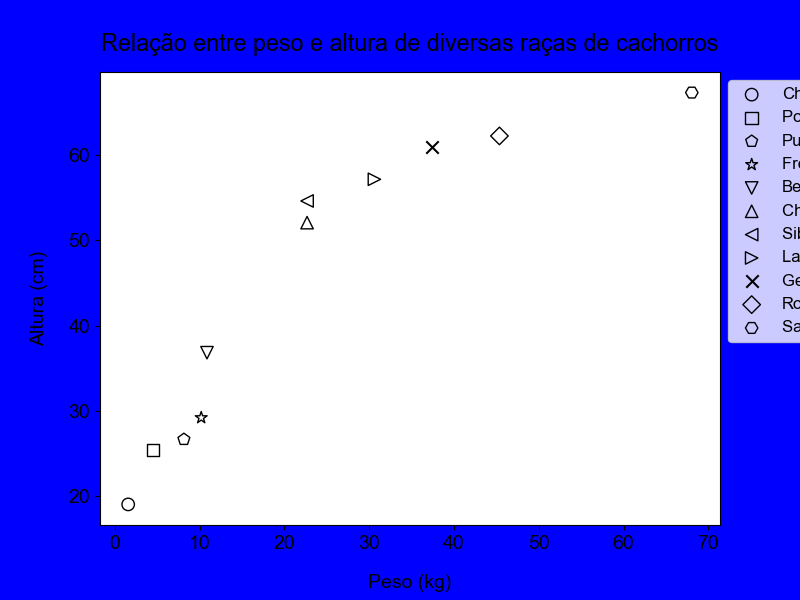

Para evitar que isto aconteça, podemos passar um o parâmetro ```bbox_inches='tight'``` em ```plt.savefig()```:

In [ ]:
plt.figure(figsize=(8,6), facecolor='blue')
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12, bbox_to_anchor=(1.,1.))
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("grafico_fundo_azul_legenda_fora_tight.png", dpi=100, bbox_inches='tight')
plt.show() 

Observe que o output gerado é semelhante ao output gerado antes de utilizar o ```bbox_inches='tight'``` em ```plt.savefig()```, mas não é igual. Observe que o espaço entre os titulos (tanto dos eixos, como do titulo) está mais próximo do limite do gráfico. O gráfico ficou 'justo'.

Já na versão exportada, agora temos a legenda inteira, como era de se esperar:

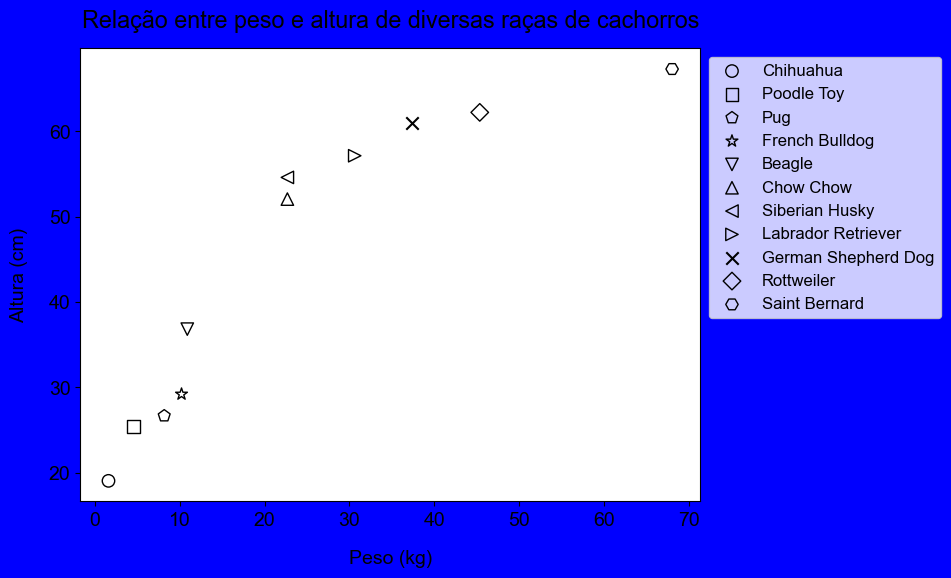

O ```bbox_inches='tight'``` é muito útil para remover espaços vazios do gráfico, sendo possível obter um gráfico maior ocupando o mesmo tamanho da figura. 

Voltando a legenda para a posição ```best``` e com o  ```bbox_inches='tight'```, obtemos:

In [ ]:
plt.figure(figsize=(8,6), facecolor='blue')
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("grafico_fundo_azul_tight.png", dpi=100, bbox_inches='tight')
plt.show() 

E sem a cor azul de fundo:

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x[0], y[0], label=raca_cachorro[0], edgecolor='k', facecolor='none', marker='o', s = marker_size)
plt.scatter(x[1], y[1], label=raca_cachorro[1], edgecolor='k', facecolor='none', marker='s', s = marker_size)
plt.scatter(x[2], y[2], label=raca_cachorro[2], edgecolor='k', facecolor='none', marker='p', s = marker_size)
plt.scatter(x[3], y[3], label=raca_cachorro[3], edgecolor='k', facecolor='none', marker='*', s = marker_size)
plt.scatter(x[4], y[4], label=raca_cachorro[4], edgecolor='k', facecolor='none', marker='v', s = marker_size)
plt.scatter(x[5], y[5], label=raca_cachorro[5], edgecolor='k', facecolor='none', marker='^', s = marker_size)
plt.scatter(x[6], y[6], label=raca_cachorro[6], edgecolor='k', facecolor='none', marker='<', s = marker_size)
plt.scatter(x[7], y[7], label=raca_cachorro[7], edgecolor='k', facecolor='none', marker='>', s = marker_size)
plt.scatter(x[8], y[8], label=raca_cachorro[8], edgecolor='k', facecolor='k', marker='x', s = marker_size)
plt.scatter(x[9], y[9], label=raca_cachorro[9], edgecolor='k', facecolor='none', marker='D', s = marker_size)
plt.scatter(x[10], y[10], label=raca_cachorro[10], edgecolor='k', facecolor='none', marker='H', s = marker_size)
plt.legend(fontsize=12)
plt.xlabel("Peso (kg)", labelpad=15)
plt.ylabel("Altura (cm)", labelpad=15)
plt.title("Relação entre peso e altura de diversas raças de cachorros", pad=15)
plt.savefig("grafico_fundo_normal_tight.png", dpi=100, bbox_inches='tight')
plt.show() 

---

<br>

### Momento para reflexão

***Como deixar o gráfico exportado fique com espaçamento justo?***

a) Passar o parâmetro tight = True em plt.scatter()

b) Passar o parâmetro tight = True em plt.Figure()

c) Passar o parâmetro bbox_inches = True em plt.savefig()

d) Passar o parâmetro bbox_inches = 'tight' em plt.savefig()



In [ ]:
reflexao(Q13)

<br>

[Voltar ao topo](#title-id)
    
---

Com isso, finalizamos esta primeira parte de constução de gráficos com o matplotlib. 

Vimos basicamente como gerar um gráfico de dispersão e como edita-lo. As principais edições de qualquer tipo de gráfico são iguais ou muito parecidas com o que vimos aqui. 

Na próxima aula, iremos ver como desenhar gráficos de dipersão com linhas como este:



 
# GRAFICO de DISPERSAO COM LINHAS





Mas antes disso, vamos fazer dois exercícios práticos para fixação de conteúdo 💪. 


#### Exercício Resolvido 1

Você encontra o notebook com os dados do Exercício Resolvido 1 [neste link](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/aula/Exerc%C3%ADcio-Resolvido-1.ipynb)

E o notebook resolvido do Exercício Resolvido 1 [neste outro link aqui](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/aula/Exerc%C3%ADcio-Resolvido-1-final.ipynb)


#### Exercício Resolvido 2

Você encontra o notebook com os dados do Exercício Resolvido 2 [neste link](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/aula/Exercicio-Resolvido-2.ipynb)

E o notebook resolvido do Exercício Resolvido 2 [neste outro link aqui](https://github.com/andersonmdcanteli/matplotlib-course/blob/main/curso/grafico-dispersao/aula/Exercicio-Resolvido-2-final.ipynb)


<a id="sobre-id"></a>

## Sobre

<br>

**Autor:** Anderson Marcos Dias Canteli, *PhD in Food Engineer*

**Atualizado pela última vez em:** 23/04/2021


### Links interessantes:

- [GitPage](http://andersonmdcanteli.github.io/)

- [Blog](https://andersoncanteli.wordpress.com/)

- [Canal no YouTube](https://www.youtube.com/c/AndersonCanteli/)

- [Curriculo Lattes](http://lattes.cnpq.br/6961242234529344)

<img style="float: right;" src="https://raw.githubusercontent.com/andersonmdcanteli/matplotlib-course/main/logo/marca_puzzle.png" alt="logo Puzzle in a Mug project" width="400">

<a id="citations-id"></a>

## Citações

- [Site oficial](https://matplotlib.org/)

- [Fonte dos dados](https://www.dimensions.com/collection/dogs-dog-breeds) 

- [Documentação para o gráfico de dispersão](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

- [Documentação para o figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

- [Lista de cores disponíveis](https://matplotlib.org/stable/gallery/color/named_colors.html) 

- [Lista de simbolos disponíveis](https://matplotlib.org/stable/api/markers_api.html).

- [Documentação para o legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

- [Documentação para o xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html).

- [Documentação para o ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).

- [Documentação para o title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html).

- [Documentação para o savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

<br>

[Voltar ao topo](#title-id)
    
---